<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#missing-values" data-toc-modified-id="missing-values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>missing values</a></span></li><li><span><a href="#target" data-toc-modified-id="target-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>target</a></span></li></ul></li><li><span><a href="#Feature-Imputation-(Missing-Values)" data-toc-modified-id="Feature-Imputation-(Missing-Values)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Imputation (Missing Values)</a></span></li><li><span><a href="#Feature-Cross" data-toc-modified-id="Feature-Cross-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Cross</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Save-Dataframe" data-toc-modified-id="Save-Dataframe-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Save Dataframe</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA

In [5]:
train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,5.2,0.34,0.37,66.5,6.2,0.031,0.995369,42.0,0.511883,1.02,133.0,0.99076,3.25,0.41,12.5,6
1,6.1,0.41,0.00,43.5,1.6,0.063,0.995691,36.0,0.514548,1.23,87.0,0.99140,3.27,0.67,10.8,6
2,7.5,0.26,0.30,46.0,4.6,0.027,0.995414,29.0,0.498311,0.78,92.0,0.99085,3.15,0.38,12.0,7
3,7.4,0.20,0.29,50.0,1.7,0.047,0.996208,16.0,0.515874,0.60,100.0,0.99243,3.28,0.45,10.6,6
4,7.3,0.23,0.24,43.0,0.9,0.031,0.994616,29.0,0.462398,0.69,86.0,0.98926,2.90,0.38,12.2,6


In [6]:
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,7.0,0.53,0.02,53.5,1.0,0.036,0.996494,39.0,0.505150,1.59,107.0,0.99300,3.20,0.32,9.0
1,7.4,0.34,0.30,84.5,14.9,0.037,0.998489,70.0,0.511883,1.02,169.0,0.99698,3.25,0.37,10.4
2,7.0,0.27,0.29,99.5,3.9,0.059,0.998048,28.0,0.549003,0.81,199.0,0.99610,3.54,0.59,10.3
3,5.9,0.25,0.27,40.5,1.5,0.029,0.994585,37.0,0.505150,0.75,81.0,0.98920,3.20,0.46,12.2
4,6.6,0.30,0.24,60.5,1.2,0.034,0.996644,17.0,0.495544,0.90,121.0,0.99330,3.13,0.36,9.2


In [7]:
train.shape

(3265, 16)

In [8]:
test.shape

(1633, 15)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3258 non-null   float64
 1   x2      3261 non-null   float64
 2   x3      3253 non-null   float64
 3   x4      3265 non-null   float64
 4   x5      3248 non-null   float64
 5   x6      3258 non-null   float64
 6   x7      3262 non-null   float64
 7   x8      3246 non-null   float64
 8   x9      3263 non-null   float64
 9   x10     3261 non-null   float64
 10  x11     3265 non-null   float64
 11  x12     3264 non-null   float64
 12  x13     3265 non-null   float64
 13  x14     3265 non-null   float64
 14  x15     3191 non-null   float64
 15  y       3265 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 408.2 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1626 non-null   float64
 1   x2      1631 non-null   float64
 2   x3      1619 non-null   float64
 3   x4      1633 non-null   float64
 4   x5      1618 non-null   float64
 5   x6      1627 non-null   float64
 6   x7      1627 non-null   float64
 7   x8      1620 non-null   float64
 8   x9      1631 non-null   float64
 9   x10     1629 non-null   float64
 10  x11     1633 non-null   float64
 11  x12     1630 non-null   float64
 12  x13     1633 non-null   float64
 13  x14     1633 non-null   float64
 14  x15     1594 non-null   float64
dtypes: float64(15)
memory usage: 191.5 KB


In [11]:
train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
count,3258.000000,3261.000000,3253.000000,3265.000000,3248.000000,3258.000000,3262.000000,3246.000000,3263.000000,3261.000000,3265.000000,3264.000000,3265.000000,3265.000000,3191.000000,3265.000000
mean,6.856292,0.277301,0.336846,69.016309,6.413608,0.045777,0.998058,35.345656,0.502590,0.831760,138.157580,0.994021,3.186873,0.489871,10.524632,5.887289
std,0.857740,0.101863,0.123391,21.432054,5.111197,0.021760,0.079613,16.582364,0.023241,0.305864,42.709637,0.003047,0.150802,0.114568,1.245047,0.885705
min,3.800000,0.080000,0.000000,4.500000,0.600000,0.009000,0.000300,2.000000,0.000300,0.010000,9.000000,0.987220,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,53.500000,1.700000,0.036000,0.995841,23.000000,0.488551,0.630000,107.000000,0.991700,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,66.500000,5.200000,0.043000,0.996853,34.000000,0.502427,0.780000,133.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,83.500000,9.900000,0.050000,0.998098,46.000000,0.515874,0.960000,167.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,172.000000,65.800000,0.346000,5.432281,138.500000,0.580925,3.300000,344.000000,1.038980,3.810000,1.080000,14.050000,9.000000


In [12]:
test.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
count,1626.000000,1631.000000,1619.000000,1633.000000,1618.000000,1627.000000,1627.000000,1620.000000,1631.000000,1629.000000,1633.000000,1630.000000,1633.000000,1633.000000,1594.000000
mean,6.852737,0.280187,0.329080,69.383344,6.324753,0.045794,1.004459,35.250000,0.504159,0.839936,138.766687,0.994039,3.191053,0.489798,10.490389
std,0.819261,0.098805,0.116509,21.040969,4.993304,0.022095,0.245073,17.813429,0.035054,0.297791,42.081938,0.002876,0.151404,0.113271,1.196761
min,4.400000,0.080000,0.000000,5.000000,0.600000,0.013000,0.993534,3.000000,0.445604,0.000000,10.000000,0.987110,2.790000,0.250000,8.400000
25%,6.300000,0.210000,0.260000,55.000000,1.700000,0.036000,0.995912,23.000000,0.489958,0.630000,110.000000,0.991840,3.090000,0.410000,9.500000
50%,6.800000,0.270000,0.310000,68.000000,5.100000,0.043000,0.996885,33.000000,0.502427,0.810000,136.000000,0.993780,3.180000,0.480000,10.400000
75%,7.300000,0.330000,0.380000,83.500000,9.800000,0.050000,0.998021,45.250000,0.515874,0.990000,167.000000,0.996047,3.280000,0.540000,11.300000
max,10.700000,0.930000,1.000000,220.000000,31.600000,0.290000,10.544433,289.000000,1.653452,2.790000,440.000000,1.010300,3.820000,1.060000,14.200000


In [13]:
train.nunique()

x1      66
x2     118
x3      85
x4     240
x5     287
x6     138
x7     777
x8     121
x9     101
x10    119
x11    240
x12    775
x13     99
x14     77
x15     92
y        7
dtype: int64

### missing values

<AxesSubplot:>

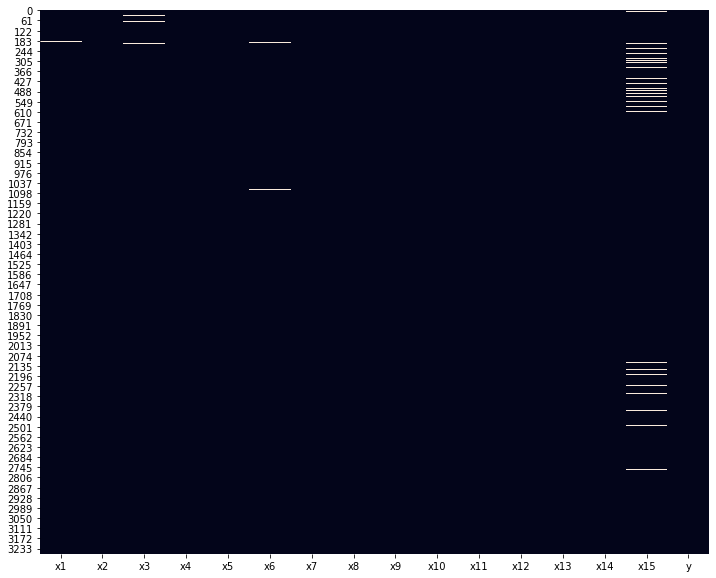

In [14]:
import seaborn as sns

plt.subplots(figsize=(12,10))
sns.heatmap(train.isnull(), cbar=False)

<AxesSubplot:>

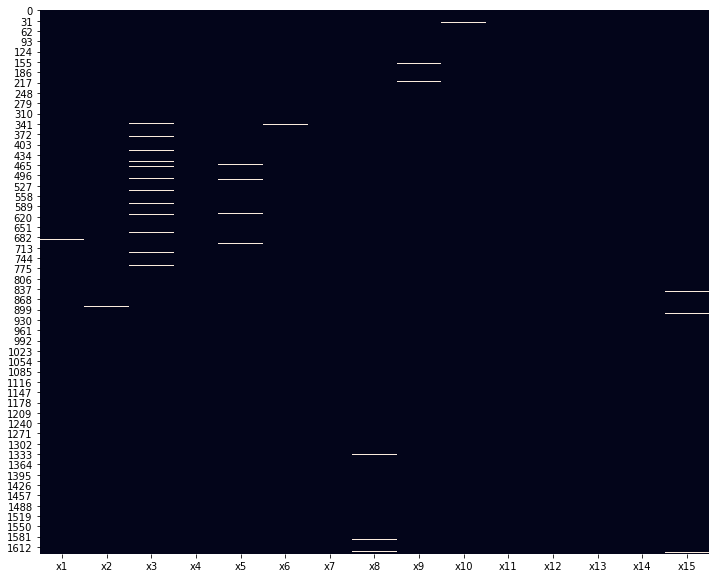

In [15]:
plt.subplots(figsize=(12,10))
sns.heatmap(test.isnull(), cbar=False)

In [16]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
x15,x15,2.266462
x8,x8,0.581930
x5,x5,0.520674
x3,x3,0.367534
x1,x1,0.214395
x6,x6,0.214395
x2,x2,0.122511
x10,x10,0.122511
x7,x7,0.091884
x9,x9,0.061256


### target

In [17]:
train['y'].value_counts()

6    1471
5     970
7     583
8     122
4     102
3      12
9       5
Name: y, dtype: int64

<AxesSubplot:>

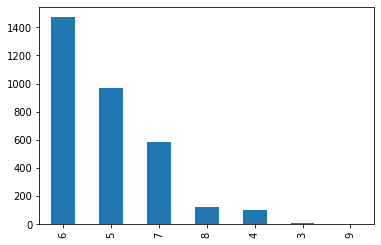

In [18]:
train['y'].value_counts().plot.bar()

In [19]:
# sns.pairplot(train, vars=train.columns[:-1], hue='y', diag_kind="hist", palette=sns.color_palette("hls", 7))

In [20]:
# ind = test[test['x3'].isnull()].index

In [21]:
# test.iloc[ind]

In [22]:
# train['x3'].mean()

In [23]:
# test['x3'].mean()

## Feature Imputation (Missing Values)

In [24]:
imputed_train = train.copy()
imputed_test = test.copy()

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

#fit and transform on training data
imputed_train_array = imputer.fit_transform(train.drop(columns='y'))

#apply transform on the test data 
imputed_test_array = imputer.transform(test)

In [26]:
train['x3'].mean()

0.33684598831847357

In [27]:
imputed_train.loc[:, :'x15'] = imputed_train_array
imputed_test.loc[:, :'x15'] = imputed_test_array

In [28]:
imputed_train.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
y      0
dtype: int64

In [29]:
imputed_test.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

## Feature Scaling

In [30]:
feature_scalled_train = imputed_train.copy()
feature_scalled_test = imputed_test.copy()

In [31]:
impute_cols = feature_scalled_test.columns
impute_cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15'],
      dtype='object')

In [32]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

feature_scalled_train[impute_cols] = sc.fit_transform(feature_scalled_train[impute_cols].values)

In [33]:
feature_scalled_test[impute_cols] = sc.transform(feature_scalled_test[impute_cols].values)

In [34]:
feature_scalled_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,-1.933365,0.615993,0.269227,-0.117427,-0.041908,-0.679902,-0.033793,0.402525,0.400068,0.615907,-0.120778,-1.070540,0.418672,-0.697257,1.605124,6
1,-0.882808,1.303720,-2.735352,-1.190750,-0.944384,0.792489,-0.029753,0.039582,0.514763,1.303012,-1.197983,-0.860461,0.551317,1.572478,0.223756,6
2,0.751390,-0.169981,-0.299207,-1.074084,-0.355813,-0.863950,-0.033224,-0.383852,-0.184208,-0.169356,-1.080895,-1.040998,-0.244549,-0.959150,1.198839,7
3,0.634662,-0.759462,-0.380412,-0.887419,-0.924765,0.056294,-0.023253,-1.170230,0.571848,-0.758303,-0.893555,-0.522365,0.617639,-0.348067,0.061242,6
4,0.517933,-0.464721,-0.786436,-1.214083,-1.081717,-0.679902,-0.043266,-0.383852,-1.730153,-0.463829,-1.221400,-1.562913,-1.902602,-0.959150,1.361353,6


## Save Dataframe

In [35]:
feature_scalled_train.to_csv("180668D_lab1_train.csv")

In [36]:
feature_scalled_test.to_csv("180668D_lab1_test.csv")